In [ ]:
from geomfum.dataset import NotebooksDataset
from geomfum.descriptor.learned import FeatureExtractor
from geomfum.forward_functional_map import ForwardFunctionalMap
from geomfum.learning.models import FMNet, ProperMapNet
from geomfum.shape import TriangleMesh


In [15]:
dataset = NotebooksDataset()

mesh_a = TriangleMesh.from_file(dataset.get_filename("cat-00"))
mesh_b = TriangleMesh.from_file(dataset.get_filename("lion-00"))

In [16]:
mesh_a.laplacian.find_spectrum(spectrum_size=100, set_as_basis=True)
mesh_b.laplacian.find_spectrum(spectrum_size=100, set_as_basis=True)

mesh_a.basis.use_k = 20
mesh_b.basis.use_k = 20


In [ ]:
fumctional_map_model = FMNet(
    feature_extractor=FeatureExtractor.from_registry(which="diffusionnet")
)

fmap12, fmap21 = fumctional_map_model(mesh_a, mesh_b)

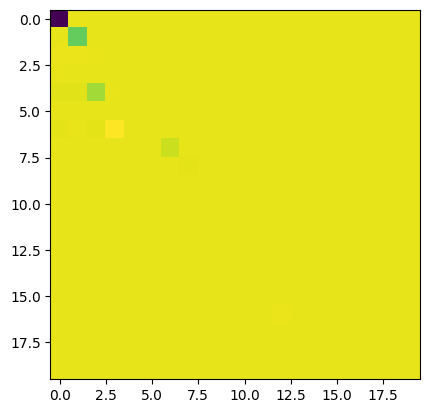

In [25]:
import matplotlib.pyplot as plt

plt.imshow(fmap12)

We can select specific modules for our network

In [28]:
fmap_module = ForwardFunctionalMap(1000, 1, False)

feature_extractor = FeatureExtractor.from_registry(which="diffusionnet")

fumctional_map_model = ProperMapNet(
    feature_extractor=feature_extractor, fmap_module=fmap_module
)

fmap12, fmap21 = fumctional_map_model(mesh_a, mesh_b)


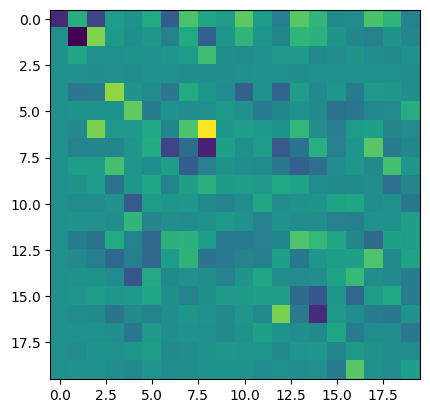

In [29]:
import matplotlib.pyplot as plt

plt.imshow(fmap12)